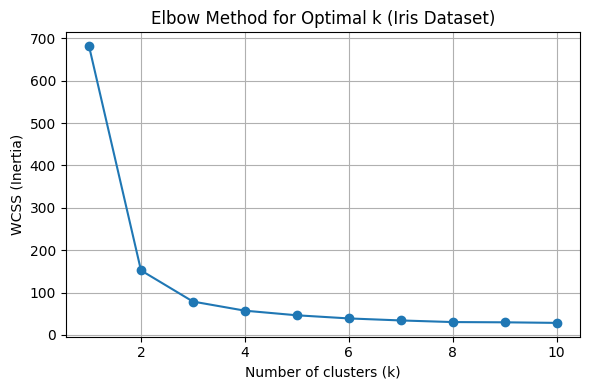

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load Iris dataset
iris = load_iris()
X = iris.data

# Compute WCSS for k = 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   # inertia_ = WCSS

# Plot elbow graph
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k (Iris Dataset)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.tight_layout()
plt.savefig("elbow-1.jpg")
plt.show()


In [2]:
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)
X = mnist.data
y = mnist.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Logistic Regression WITHOUT PCA
# -----------------------------
start_time = time.time()

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)
preds = log_reg.predict(X_test_scaled)

acc_no_pca = accuracy_score(y_test, preds)
time_no_pca = time.time() - start_time

# -----------------------------
# Logistic Regression WITH PCA
# -----------------------------
pca = PCA(0.95)  # keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

start_time = time.time()

log_reg_pca = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg_pca.fit(X_train_pca, y_train)
preds_pca = log_reg_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, preds_pca)
time_pca = time.time() - start_time

# -----------------------------
# Results
# -----------------------------
print("Number of PCA components kept:", X_train_pca.shape[1])
print("\n--- Logistic Regression WITHOUT PCA ---")
print("Accuracy:", acc_no_pca)
print("Time:", time_no_pca, "seconds")

print("\n--- Logistic Regression WITH PCA (95% variance) ---")
print("Accuracy:", acc_pca)
print("Time:", time_pca, "seconds")


Number of PCA components kept: 330

--- Logistic Regression WITHOUT PCA ---
Accuracy: 0.9153571428571429
Time: 62.68418025970459 seconds

--- Logistic Regression WITH PCA (95% variance) ---
Accuracy: 0.922
Time: 51.59324836730957 seconds
